<a href="https://colab.research.google.com/github/minkyeongk/DL_TensorFlow_Developer/blob/main/1.%20Introduction%20to%20TensorFlow%20for%20Artificial%20Intelligence%2C%20Machine%20Learning%2C%20and%20Deep%20Learning/week_2/week_2_notebook_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer Vision Example

2.4.0
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 22

[0.35039496421813965, 0.8727999925613403]

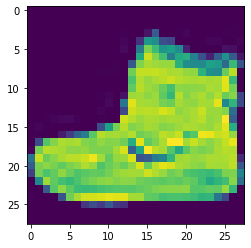

In [6]:
import tensorflow as tf
print(tf.__version__)   # tensorflow 2.4

mnist = tf.keras.datasets.fashion_mnist     # tf keras datasets API 로 제공됨 
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()        # API로 불러온 object에서 데이터 불러오기 

import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_imgs[0])  # 원본 이미지 보여주는 코드 
print(train_labels[0])
print(train_imgs[0])

# 0~255 사이의 값을 0과 1사이의 값으로 nomalize, 연산의 이점 
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),       # Sequential: 레이어의 시퀀스를 정의 / Flatten: square 이미지를 1차원으로 변환 
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),   # Dense: layer of neurons 추가  
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
# 각 layer는 각자의 역할을 알려주는 activation 함수를 필요로 함
# Relu: x가 0 이상이면 x 반환, 아니면 0 반환
# softmax: 가장 큰 값을 뽑아준다 ex) [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05] -> [0,0,0,0,1,0,0,0,0]
#           코딩을 줄여주기 위함

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_imgs, train_labels, epochs=5)

model.evaluate(test_imgs, test_labels)    # test data에 대한 loss와 accuracy 출력  

**exercise 1**

In [10]:
classifications = model.predict(test_imgs)
print(classifications[0]) # 이 아이템이 10가지 각 클래스일 확률  
print(test_labels[0])
# 리스트의 9번째 값이 제일 큼 (인덱스 0부터 시작) > 따라서 0번째 이미지는 label9인 ankle boot

[3.3519902e-06 3.5274017e-08 1.1624362e-06 6.0596204e-07 1.2431044e-06 8.8487277e-03 1.0796257e-05 3.4803949e-02 1.1043896e-05 9.5631903e-01]
9


exercise 2

In [12]:
import tensorflow as tf 
print(tf.__version__)

mnist = tf.keras.datasets.mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

# hidden layer의 unit을 늘림 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(train_imgs, train_labels, epochs=5)
model.evaluate(test_imgs, test_labels)

classifications = model.predict(test_imgs)
print(classifications[0])
print(test_labels[0])

# 유닛 수 증가 > 시간이 더 오래걸리지만 정확도가 높아짐 
# adding more Neurons > more calculations > slowing down the process  

2.4.0
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3067
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0729
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0464
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0303
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0767
[4.8464701e-11 1.3235640e-08 2.8530871e-09 1.1709471e-05 8.8176938e-13 7.5627982e-10 8.5175607e-14 9.9998617e-01 1.2541097e-09 2.1586477e-06]
7


**exercise 3**

: flatten 안해주면 data shape로 인해 error 발생 

the first layer in your network should be the same shape as your data

**exercise 4**

: output layer의 unit 개수를 10이 아닌 다른 수로 설정하면 error 발생 

the number of neurons in the last layer should match the number of classes you are classifying for.

**exercise 5**

: additional hidden layer를 추가할 경우 별다른 차이 없음, 이 데이터는 간단한 데이터이기 때문

이후 색이 있는 이미지 같이 복잡한 데이터를 다룰 때는 extra layer가 필수적일 수 있다.

**exercise 6**

: epoch 수 변경 

epoch 수를 늘리면 성능 향상을 보일 수 있음, 하지만 overfitting으로 오히려 loss가 증가할 수도 있음 

**exercise 7**

: nomalize 단계를 skip 한다면?

결과가 크게 다르지 않은데..?

exercise 8

: 정확도가 원하는 값에 다다랐을 때 그 이상의 epoch를 중단하도록 하는 방법 

callback 활용 

In [14]:
import tensorflow as tf 
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\nReached 60% accuracy so cancelling training")
      self.model.stop_training = True 

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0 

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_imgs, train_labels, epochs=5, callbacks=[callbacks])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5972
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3703

Reached 60% accuracy so cancelling training
